In [1]:
import geometry
import numpy as np
import numba as nb
import ezdxf
import matplotlib.pyplot as plt
import pyperclip

In [2]:
def format_fp(d, N=5):
    """Format a floating point number to N decimal places."""
    return f"{d:.{N}f}"

def path_to_cpp(path: geometry.Path):
    """Convert a Path object to a compact array format for C++."""
    points = path.to_compact_array()

    s = "\tpath *p = path::from_compact_array({\n"
    for point in points:
        s += f"\t\tcompact_point({format_fp(point[0])}, {format_fp(point[1])}, {format_fp(point[2])}),\n"

    s += "\t}, true);\n"
    return s



In [3]:
import matplotlib.pyplot as plt

def draw_line(ax, line: geometry.LineSegment, color='k'):
    plt.plot([line.start.x, line.end.x], [line.start.y, line.end.y], color=color)

def draw_arc(ax, arc: geometry.ArcSegment, color='k'):
    # print(f"Start angle: {arc.start_angle}, End angle: {arc.end_angle}, Center: {arc.center}")
    angle = np.linspace(arc.start_angle, arc.end_angle, 72)
    x = arc.center.x + arc.radius * np.cos(angle)
    y = arc.center.y + arc.radius * np.sin(angle)
    ax.plot(x, y, color=color)

def draw_segment(ax, segment: geometry.Segment, color='k'):
    if isinstance(segment, geometry.LineSegment):
        draw_line(ax, segment, color=color)
    elif isinstance(segment, geometry.ArcSegment):
        draw_arc(ax, segment, color=color)

def draw_path(ax, path: geometry.Path):
    if hasattr(path, '__iter__'):
        for p in path:
            draw_path(ax, p)
    else:
        if path.clockwise_winding():
            color = 'r'
        else:
            color = 'b'
        for segment in path.segments():
            draw_segment(ax, segment, color=color)


def load_dxf(filename) -> geometry.Path:
    """Load a DXF file and extract paths from LWPOLYLINE entities."""
    doc = ezdxf.readfile(filename)
    msp = doc.modelspace()

    paths = []
    polylines = msp.query("LWPOLYLINE")
    for path in polylines:
        points = np.array(path.get_points())
        points = points[:, [0, 1, 4]].astype(np.float32)  # x, y, bulge
        paths.append(geometry.Path.from_compact_array(points))

    if len(paths) == 0:
        return None
    elif len(paths) > 1:
        return paths
    else:
        return paths[0]

[{'path1': <geometry.Path at 0x71343a74b5d0>,
  'index1': 2,
  'path2': <geometry.Path at 0x71343a74b5d0>,
  'index2': 11,
  'point': Vec2D(5.0, 10.0)},
 {'path1': <geometry.Path at 0x71343a74b5d0>,
  'index1': 10,
  'path2': <geometry.Path at 0x71343a74b5d0>,
  'index2': 3,
  'point': Vec2D(5.0, 18.0)}]

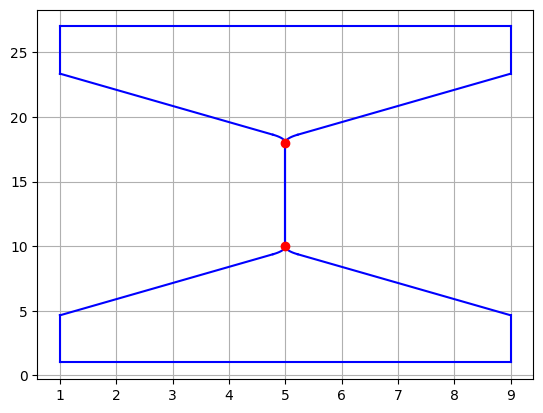

In [4]:
path = load_dxf("dogbone_test.dxf")
path2 = path.offset(-1, cull=False)
draw_path(plt.gca(), path2)
plt.grid()

inter = geometry.intersections(path2)

for i in inter:
    plt.plot(i['point'].x, i['point'].y, 'ro')

inter

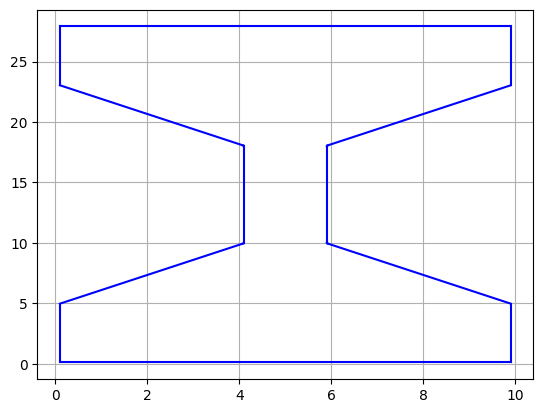

In [9]:
def offset(path, distance: float, arc: bool = True, cull: bool = True):
    if hasattr(path, '__iter__'):
        p = []
        for subpath in path:
            p.extend(offset(subpath, distance, arc, cull))
        return p
    else:
        return path.offset(distance, arc=arc, cull=cull)

path = load_dxf("dogbone_test.dxf")

# s = path_to_cpp(path)
# pyperclip.copy(s)
# print(s)

def get_contour(path, distance: float, N=1):
    i = 0
    all_paths = []
    while path and i < N:
        path = offset(path, distance, cull=True)
        i += 1
        all_paths.append(path)
    return all_paths
    # draw_path(plt.gca(), path)

all_paths = get_contour(path, -0.1)
# path = all_paths[0][0]
# intersections = geometry.intersections([path])
# for i in intersections:
#     plt.plot(i['point'].x, i['point'].y, 'ro')

draw_path(plt.gca(), all_paths)
# dx = 1
# dy = 1
# x = 6
# y = 10
# plt.xlim(x-dx, x+dx)
# plt.ylim(y-dy, y+dy)

plt.grid()
# print(path[0].c_to_string())
# plt.axis('equal')

# s = path_to_cpp(path[0])
# pyperclip.copy(s)
# print(s)
# plt.axis('equal')
#     plt.plot(i['point'].x, i['point'].y, 'ro')
# all_paths

# %timeit get_contour(path, -1)

In [6]:
error = np.sin(.1/180*np.pi)
np.rad2deg(np.asin(1e-3))


np.float64(0.0572957890623832)

In [7]:
i

{'path1': <geometry.Path at 0x71343a74b5d0>,
 'index1': 10,
 'path2': <geometry.Path at 0x71343a74b5d0>,
 'index2': 3,
 'point': Vec2D(5.0, 18.0)}

In [8]:
print(f"Total offset: {total_offset:.1f}")
if path:
    all_paths.append(path)
    path = offset(path, -5, cull=False)
    total_offset += 5
    print(path)
else:
    print("Done")

# s = path_to_cpp(path[0])
# print(s)
# pyperclip.copy(s)

# loops = path[0].get_closed_loops()
# %timeit offset(path, -4.5, cull=True)
# # path = offset(path, -0.5, cull=True)
# # path = path2
# # path2 = offset(path, -2.5, cull=True)
draw_path(plt.gca(), all_paths)
plt.axis('equal')
plt.grid()

NameError: name 'total_offset' is not defined